<a href="https://colab.research.google.com/github/abhranil-datascience/RegressionPOC/blob/master/SimpleLinearRegressionPOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
############################## Mount Drive ######################################## 
from google.colab import drive
drive.mount('/content/gdrive')
############################## Change Directory ###################################
import os
os.chdir('/content/gdrive/My Drive/MLandDLFullCourse/ML/Regression/SimpleLinearRegression')
########## Suppress Warnings ############
import warnings
warnings.filterwarnings('ignore')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
########### Read Data ##############
import pandas as pd
dataset=pd.read_csv('Salary_Data.csv')
Experience=dataset.iloc[:,0:1].values
Salary=dataset.iloc[:,1].values

In [0]:
########### Scale Data #############
from sklearn.preprocessing import StandardScaler
sc_Experience=StandardScaler()
sc_Salary=StandardScaler()
ExperienceScaled=sc_Experience.fit_transform(Experience)
SalaryScaled=sc_Salary.fit_transform(Salary.reshape(-1,1))
########## Create Test Train data #############
from sklearn.model_selection import train_test_split
ExperienceTrain,ExperienceTest,SalaryTrain,SalaryTest=train_test_split(ExperienceScaled,SalaryScaled,test_size=0.1,random_state=42)
########## Check If it's Linear or Non Linear data #############
from sklearn.svm import SVR
svr=SVR()
from sklearn.model_selection import GridSearchCV
parameters=[{'kernel':['linear','rbf','poly','sigmoid']}]
GS=GridSearchCV(estimator=svr,param_grid=parameters,scoring='neg_mean_squared_error',cv=10)
GS.fit(ExperienceTrain,SalaryTrain)
best_params=GS.best_params_#Linear

In [0]:
######### Create Regressor and Check R2 ##############
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
params=[{'fit_intercept':[True,False],
        'normalize':[True,False]}]
RegressionGS=GridSearchCV(estimator=LR,param_grid=params,scoring='neg_mean_squared_error',cv=10)
RegressionGS.fit(ExperienceTrain,SalaryTrain)
best_LR_params=RegressionGS.best_estimator_#fit_intercept=False,normalize=True
LR=LinearRegression(fit_intercept=False,normalize=True)
from sklearn.model_selection import KFold
from sklearn import metrics as mt
import statistics as st
r2=[]
for count in range(0,100):
  kfold=KFold(n_splits=3,shuffle=True)
  for train_index,test_index in kfold.split(ExperienceTrain):
    ExperienceKFoldtrain,SalaryKFoldtrain=ExperienceTrain[train_index],SalaryTrain[train_index]
    ExperienceKFoldVal,SalaryKFoldVal=ExperienceTrain[test_index],SalaryTrain[test_index]
    LR.fit(ExperienceTrain,SalaryTrain)
    SalaryPred=LR.predict(ExperienceKFoldVal)
    r2.append(mt.r2_score(SalaryKFoldVal,SalaryPred))
avg_r2=st.mean(r2)
print("Goodness Of Fit: "+str(avg_r2))#0.947181589183795

Goodness Of Fit: 0.9434211535385921


In [0]:
######### Apply Linear Regression ################
LR.fit(ExperienceTrain,SalaryTrain)
PredictedSalary=sc_Salary.inverse_transform(LR.predict(ExperienceTest))

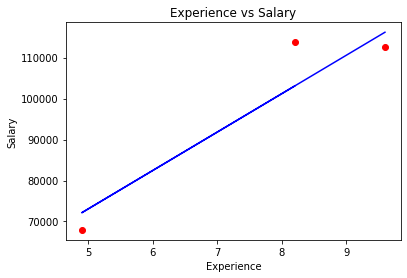

In [0]:
######### Plot Graph #############
import matplotlib.pyplot as plt
plt.scatter(sc_Experience.inverse_transform(ExperienceTest),sc_Salary.inverse_transform(SalaryTest),c='red')
plt.plot(sc_Experience.inverse_transform(ExperienceTest),PredictedSalary,c='blue')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()